# Clasificador KNN
### usando base de datos breast-cancer-wisconsin

In [2]:
import pandas as pd

In [28]:
#tomando la base de datos como un dataframe
ds = pd.read_csv("../datasets/breast-cancer-wisconsin/PCA_breast-cancer-wisconsin.csv")

In [29]:
ds.head()

,x1,x2,diagnosis
0,1160.142574,-293.917544,M
1,1269.122443,15.630182,M
2,995.793889,39.156743,M
3,-407.180802,-67.380320,M
4,930.341180,189.340742,M


### separar la base de datos en caracteristicas y clases

In [34]:
x = ds[["x1","x2"]]
ds[["diagnosis"]] = ds[["diagnosis"]].replace(['B'],0)
ds[["diagnosis"]] = ds[["diagnosis"]].replace(['M'],1)
y = ds[["diagnosis"]]

### validación cruzada

In [6]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sbs
import matplotlib.pyplot as plt

#### Función para entrenar el modelo y mostrar matriz de confusión

In [37]:
def train_clf(model,X_train,X_test,y_train,y_test,labels):
    model.fit(X_train,y_train.values.ravel())
    model_predicted = model.predict(X_test)
    confusion_ma = confusion_matrix(y_test,model_predicted)
    accuracy = model.score(X_test,y_test.values.ravel())
    print("Predicción del modelo:")
    print(model_predicted)
    print("Valores reales:")
    print(y_test.values.ravel())    
    print('Precisión del modelo:',accuracy*100,'%')
    print('-----------\n')
    print("Matriz de confusión")
    sbs.heatmap(data=confusion_ma,cmap="Pastel1",annot=True,xticklabels=labels,yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("predicción")
    return confusion_ma    

#### función para mostrar la curva ROC del modelo

In [21]:
def plot_roc_curve(model,X_test,y_test):
    #El modelo debe estar ajustado previamente
    #model.fit(X_test,y_test.values.ravel())
    y_scores = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr,tpr)
    plt.title('Curva ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Verdadero Positivo')
    plt.xlabel('Falso Positivo')
    plt.show()

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

Predicción del modelo:
[1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 1 0]
Valores reales:
[1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 0 0 0]
Precisión del modelo: 94.73684210526315 %
-----------

Matriz de confusión


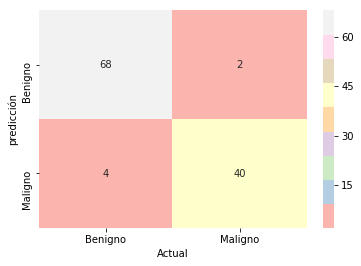

In [72]:
KNN = KNeighborsClassifier(n_neighbors=2,p=2)
labels = ["Benigno","Maligno"]
conf_ma = train_clf(model=KNN,X_train=x_train,X_test=x_test,y_train=y_train,y_test=y_test,labels=labels)

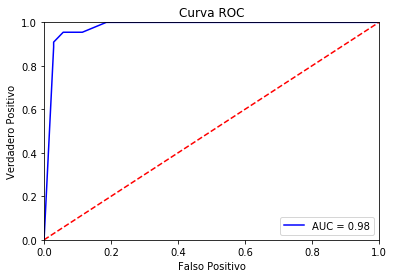

In [71]:
plot_roc_curve(model=KNN,X_test=x_test,y_test=y_test)